# Churn Prediction model

## Imorting dependencies 

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.loc[df['Churn'] == 'No', 'Churn'] = 0
df.loc[df['Churn'] == 'Yes', 'Churn'] = 1


In [5]:
df['gender']=LabelEncoder().fit_transform(df['gender'])

In [6]:
cat_columns = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService'	,
               'OnlineSecurity','DeviceProtection'	,'TechSupport',	'StreamingTV','StreamingMovies'	,'Contract'
                ,'PaperlessBilling','PaymentMethod'	]

for col in cat_columns:
    df[col]=LabelEncoder().fit_transform(df[col])
df[cat_columns]


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,0,0,1,0,0,0,0,0,0,0,1,2
1,1,0,0,1,0,0,2,2,0,0,0,1,0,3
2,1,0,0,1,0,0,2,0,0,0,0,0,1,3
3,1,0,0,0,1,0,2,2,2,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,2,2,2,2,1,1,3
7039,0,1,1,1,2,1,0,2,0,2,2,1,1,1
7040,0,1,1,0,1,0,2,0,0,0,0,0,1,2
7041,1,1,0,1,2,1,0,0,0,0,0,0,1,3


In [7]:
num_columns = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
for col in num_columns:
    df[col]=pd.to_numeric(df[col], errors='coerce').fillna(0)
df[num_columns]=StandardScaler().fit_transform(df[num_columns])
df[num_columns]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.439916,-1.277445,-1.160323,-0.992611
1,-0.439916,0.066327,-0.259629,-0.172165
2,-0.439916,-1.236724,-0.362660,-0.958066
3,-0.439916,0.514251,-0.746535,-0.193672
4,-0.439916,-1.236724,0.197365,-0.938874
...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.127605
7039,-0.439916,1.613701,1.277533,2.242606
7040,-0.439916,-0.870241,-1.168632,-0.852932
7041,2.273159,-1.155283,0.320338,-0.870513


In [8]:
X = df.loc[:,['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService'	,
               'OnlineSecurity','DeviceProtection'	,'TechSupport',	'StreamingTV','StreamingMovies'	,'Contract'
                ,'PaperlessBilling','PaymentMethod'	]]

In [9]:
y=df['Churn']

In [10]:
model = RandomForestRegressor(n_estimators=200,random_state=100)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=100)

In [12]:
y_pred = model.predict(X_test)

for i in range(len(y_pred)):
    if y_pred[i]>0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0

y_pred = y_pred.astype(int)
y_pred.dtype
y_pred


array([0, 0, 0, ..., 0, 0, 1])

In [13]:
print(f"y_test unique values: {np.unique(y_test)}")
print(f"y_pred unique values: {np.unique(y_pred)}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")
y_pred = y_pred.ravel()
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")

y_test unique values: [0 1]
y_pred unique values: [0 1]
Shape of y_test: (1409,)
Shape of y_pred: (1409,)
Shape of y_test: (1409,)
Shape of y_pred: (1409,)


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



accuracy = accuracy_score(y_test, y_pred)


precision = precision_score(y_test, y_pred)


recall = recall_score(y_test, y_pred)


f1 = f1_score(y_test, y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



ValueError: Classification metrics can't handle a mix of unknown and binary targets

# DEEP LEARNING APPROACH

In [15]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential,layers
from tensorflow.keras.layers import BatchNormalization,Dense
from tensorflow.keras.callbacks import EarlyStopping 

In [16]:
X_train.shape

(5634, 18)

In [17]:
model_dl = keras.Sequential([
    layers.BatchNormalization(input_shape = [19]),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(16,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1,activation='sigmoid'),
])
model_dl.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics=['binary_accuracy'],
)

/Users/aryansahni/miniforge3/lib/python3.12/site-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
early_stopping = EarlyStopping(
    patience = 10,
    min_delta = 0.0001,
    restore_best_weights=True,
)

In [19]:
df_new = pd.read_csv('dl2.csv')  
df['Churn']=df['Churn'].astype(int)
df_new['MonthlyCharges']=df_new['MonthlyCharges'].astype(int)
df_new['TotalCharges'] = pd.to_numeric(df_new['TotalCharges'], errors='coerce').fillna(0)
df_new['TotalCharges'] = df_new['TotalCharges'].astype(int)
df_new['TotalCharges']


0         29
1       1889
2        108
3       1840
4        151
        ... 
7038    1990
7039    7362
7040     346
7041     306
7042    6844
Name: TotalCharges, Length: 7043, dtype: int64

In [20]:
X_dl = df_new.drop(['customerID','OnlineBackup','Churn'],axis=1)
y=df['Churn']
X_dl

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,2,29,29
1,1,1,0,0,0,34,1,0,0,2,2,0,0,0,1,0,3,56,1889
2,2,1,0,0,0,2,1,0,0,2,0,0,0,0,0,1,3,53,108
3,3,1,0,0,0,45,0,1,0,2,2,2,0,0,1,0,0,42,1840
4,4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,1,2,70,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,0,1,1,24,1,2,0,2,2,2,2,2,1,1,3,84,1990
7039,7039,0,0,1,1,72,1,2,1,0,2,0,2,2,1,1,1,103,7362
7040,7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,1,2,29,346
7041,7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,1,3,74,306


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X_dl,y,test_size=0.2)

In [22]:
history = model_dl.fit(
    X_train,y_train,
    validation_data = [X_test,y_test],
    batch_size = 200,
    epochs = 200,
    callbacks = [early_stopping]
) 

Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - binary_accuracy: 0.5391 - loss: 0.8603 - val_binary_accuracy: 0.5869 - val_loss: 0.6778
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6232 - loss: 0.6946 - val_binary_accuracy: 0.7445 - val_loss: 0.5625
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6687 - loss: 0.6391 - val_binary_accuracy: 0.7637 - val_loss: 0.5232
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7166 - loss: 0.5819 - val_binary_accuracy: 0.7708 - val_loss: 0.5000
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7245 - loss: 0.5625 - val_binary_accuracy: 0.7764 - val_loss: 0.4817
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7332 - loss: 0.5388 - val_binary_accuracy: 0.7828 - val_loss: 0.4675
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7522 - loss: 0.5287 - val_binary_accuracy: 0.7857 - val_loss: 0.4591
Epoch 8/200
2

<Axes: >

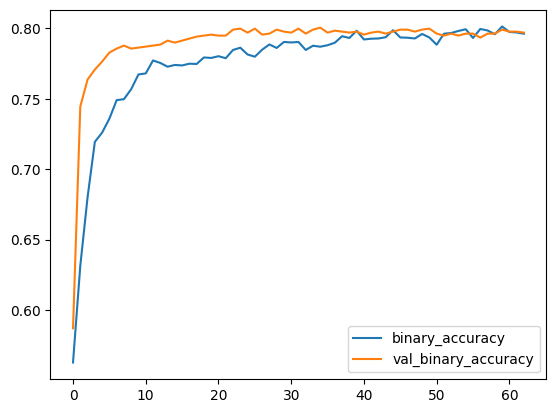

In [23]:
data = pd.DataFrame(history.history)
data.loc[:,['binary_accuracy','val_binary_accuracy']].plot()

<Axes: >

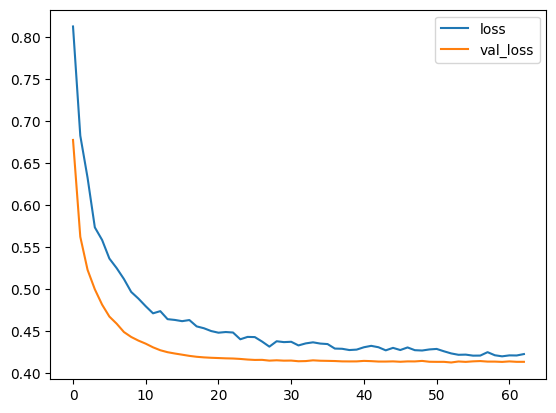

In [24]:
data.loc[:,['loss','val_loss']].plot()

In [25]:
y_pred = model_dl.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)


precision = precision_score(y_test, y_pred)


recall = recall_score(y_test, y_pred)


f1 = f1_score(y_test, y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7963094393186657
Precision: 0.651685393258427
Recall: 0.47282608695652173
F1 Score: 0.5480314960629922
